# Data Science and Business Analytics Internship - The Sparks Foundation

### By : Avinash Yadav

## Task: Prediction using Unsupervised ML

### Problem Statement:

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### Introduction to k-means clustering

k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. It is popular for cluster analysis in data mining. k-means clustering minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances, which would be the more difficult Weber problem: the mean optimizes squared errors, whereas only the geometric median minimizes Euclidean distances. For instance, better Euclidean solutions can be found using k-medians and k-medoids.

### Approach towards the problem:

Predicting iris- flower species with k-means clustering

## 1. Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

## 2. Data Preparation

In [2]:
#Loading the Dataset

iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Let us check the basic info about the data
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
iris.shape

(150, 6)

In [5]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Data Cleaning

In [6]:
#Let us check the null values

iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

As we can see there are no null values in the dataset, we are good.

In [7]:
#Let us drop the id column as it is not required
iris.drop('Id', axis =1, inplace = True)

In [8]:
#Let us check the value counts for different species


iris.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [9]:
#Let us check  the head again
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 3. Exploratory Data Analysis

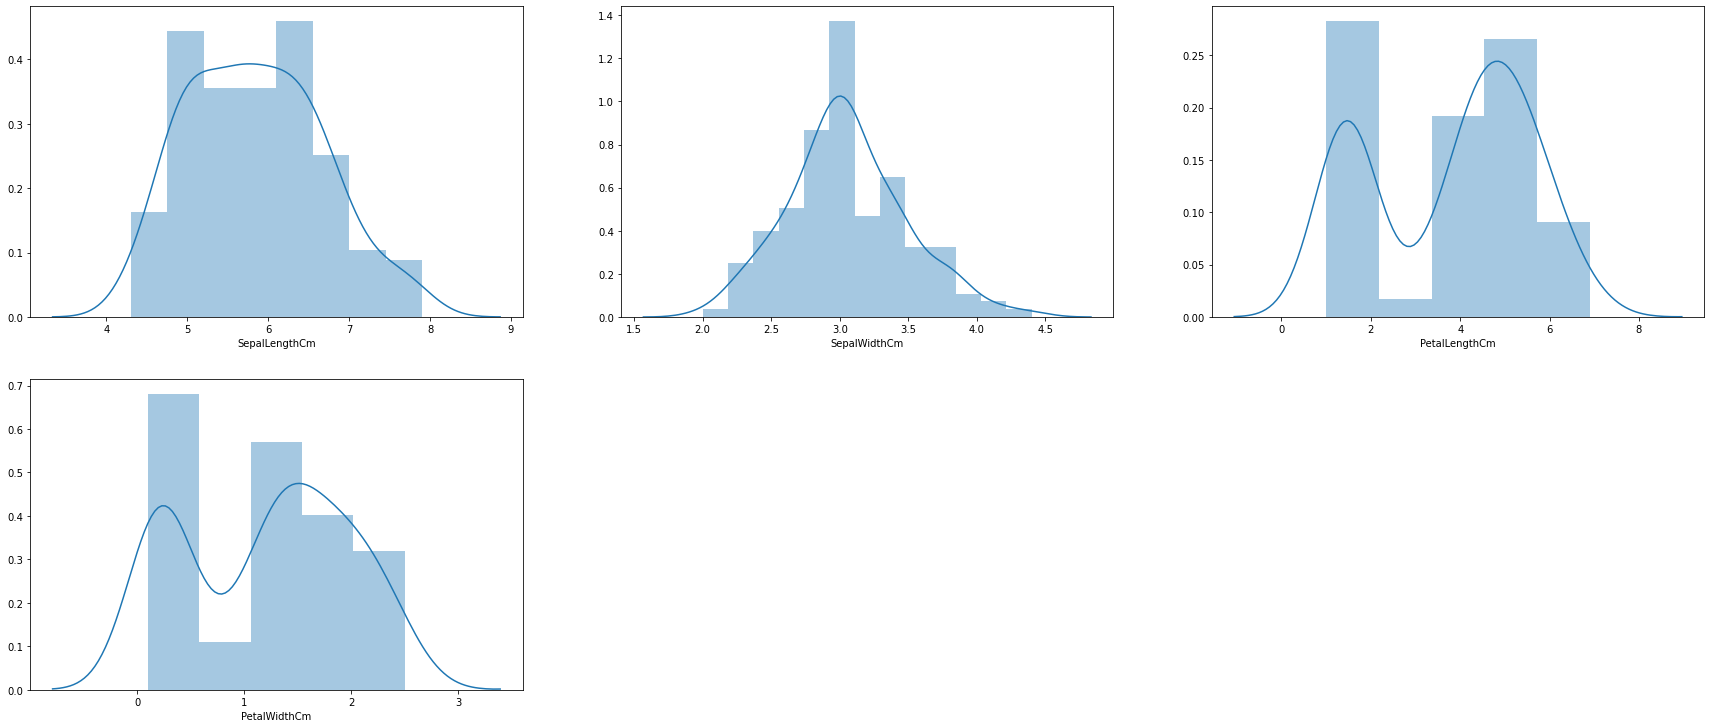

In [10]:
#Let us check the distribution plot for diffferent columns to understand which columns have normal distribution

plt.figure(figsize = (30,40))
feature = iris.columns[:-1]
for i in enumerate(feature):
    plt.subplot(6,3, i[0]+1)
    sns.distplot(iris[i[1]])

As we can conclude from the above figures that, 
SepalLengthCm and SepalWidthCm are normally distributed whereas PetalLengthCm and PetalWidthCm are not.

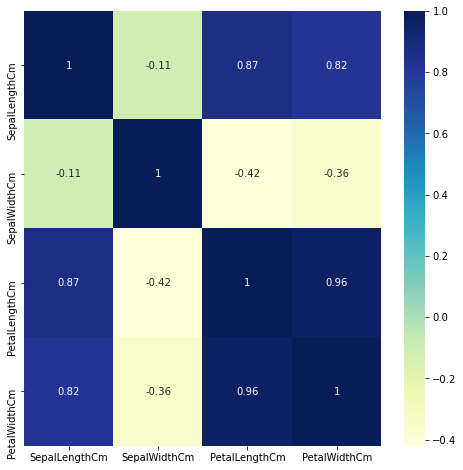

In [11]:
# Let us plot the heatmap to understand the attributes dependency

# Let us draw heatmap to understand the corelation better.
plt.figure(figsize = (8,8))  
sns.heatmap(iris.corr(),annot = True,cmap="YlGnBu")

From the above figure, it is evident that Petal width and petal lenth are highly correlated and Sepal Length and Petal Length are also correlated.

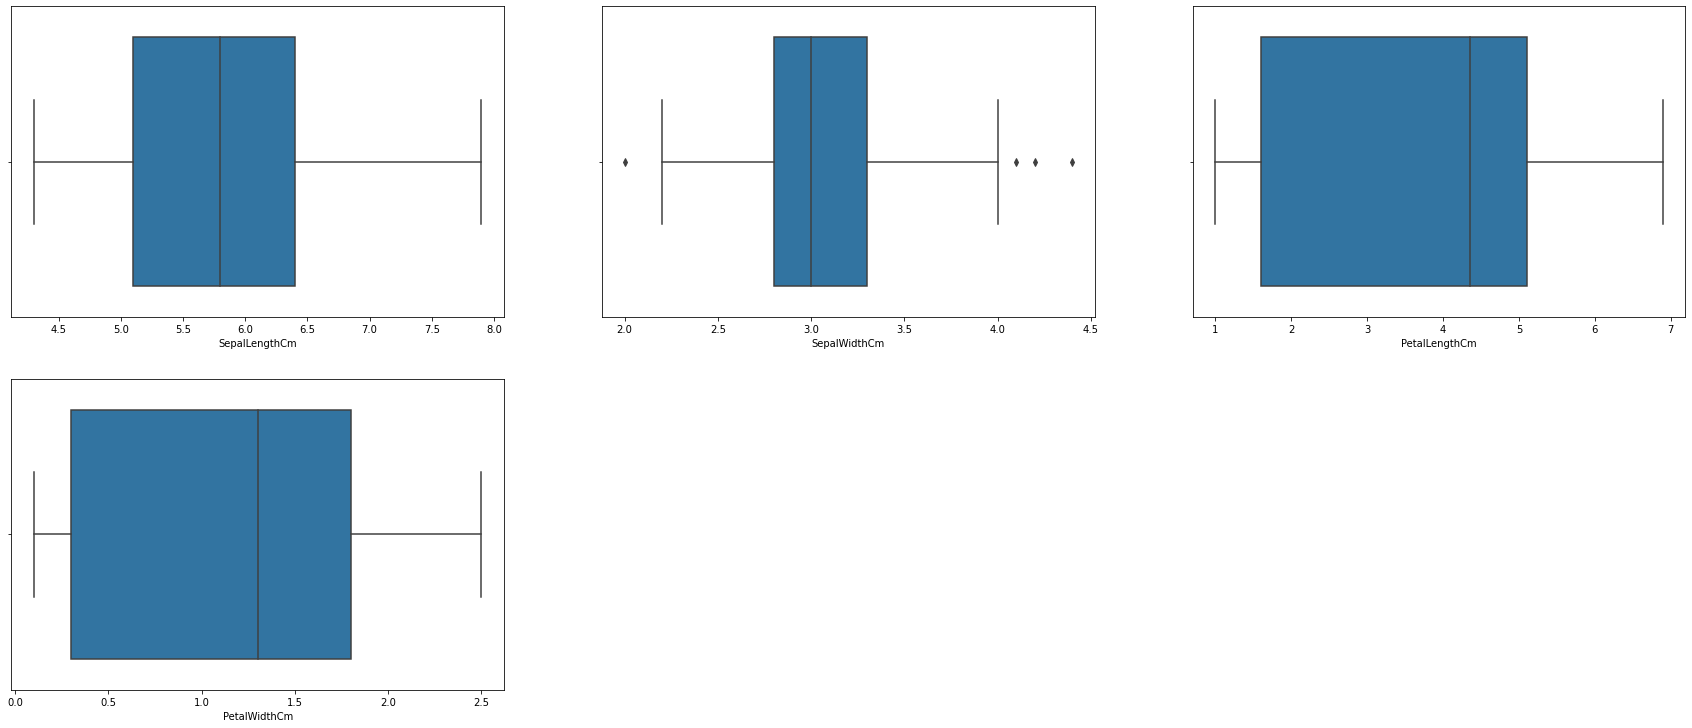

In [12]:
#Let us plot a boxplot to understand if we have any outliers in the dataset


plt.figure(figsize = (30,40))
feature = iris.columns[:-1]
for i in enumerate(feature):
    plt.subplot(6,3, i[0]+1)
    sns.boxplot(iris[i[1]])

As we can see, the SepalwidthCm  has few outliers, let us treat them.

In [13]:
# Let us remove outliers from 'sepal width (cm)'
q1 = iris['SepalWidthCm'].quantile(0.25)
q3 = iris['SepalWidthCm'].quantile(0.75)

In [14]:
# Let us find out the number of rows and column after outlier treatment
iqr = q3 - q1
iris = iris[(iris['SepalWidthCm'] >= q1-1.5*iqr) & (iris['SepalWidthCm'] <= q3+1.5*iqr)]
iris.shape

(146, 5)

As we can see the number of rows, dropped from 150 to 146 after outlier treatment.

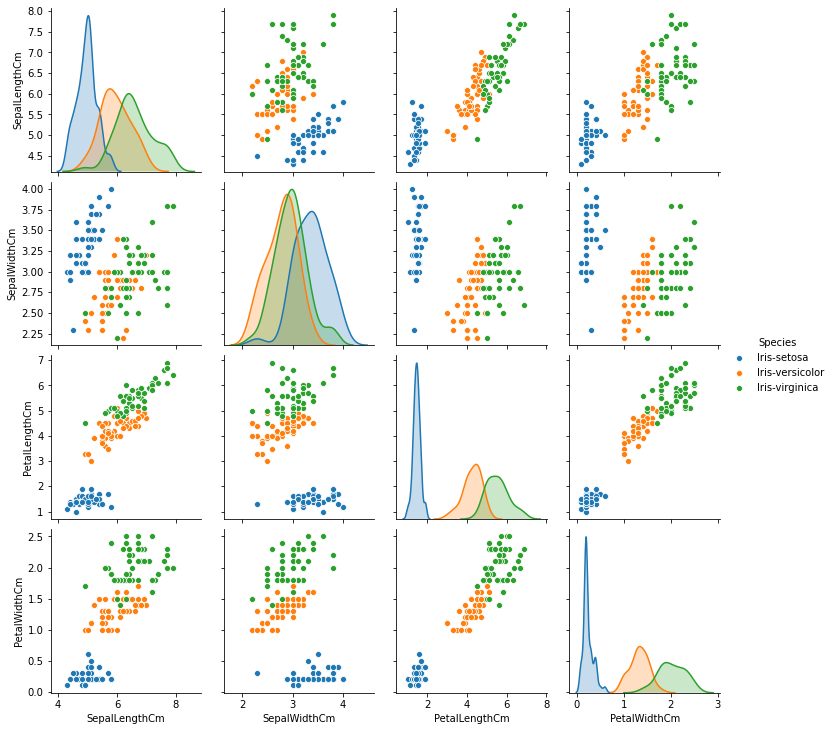

In [15]:
#let us plot the scatter plot for different speecies to understand the current clustering of data

sns.pairplot(iris, hue = "Species")
plt.show()

## 4. Clustering

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris1 = scaler.fit_transform(iris.drop('Species', axis = 1))
iris1

array([[-0.9105154 ,  1.1757891 , -1.3748782 , -1.34589856],
       [-1.15112218, -0.09392398, -1.3748782 , -1.34589856],
       [-1.39172896,  0.41396125, -1.43198551, -1.34589856],
       [-1.51203236,  0.16001863, -1.31777088, -1.34589856],
       [-1.03081879,  1.42973171, -1.3748782 , -1.34589856],
       [-0.54960522,  2.19155956, -1.20355625, -1.08196143],
       [-1.51203236,  0.92184648, -1.3748782 , -1.21392999],
       [-1.03081879,  0.92184648, -1.31777088, -1.34589856],
       [-1.75263914, -0.3478666 , -1.3748782 , -1.34589856],
       [-1.15112218,  0.16001863, -1.31777088, -1.47786712],
       [-0.54960522,  1.68367433, -1.31777088, -1.34589856],
       [-1.27142557,  0.92184648, -1.26066356, -1.34589856],
       [-1.27142557, -0.09392398, -1.3748782 , -1.47786712],
       [-1.87294253, -0.09392398, -1.54620014, -1.47786712],
       [-0.06839165,  2.44550218, -1.48909283, -1.34589856],
       [-0.54960522,  2.19155956, -1.43198551, -1.08196143],
       [-0.9105154 ,  1.

In [17]:
iris1 = pd.DataFrame(iris1, columns = iris.columns[:-1])
iris1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.910515,1.175789,-1.374878,-1.345899
1,-1.151122,-0.093924,-1.374878,-1.345899
2,-1.391729,0.413961,-1.431986,-1.345899
3,-1.512032,0.160019,-1.317771,-1.345899
4,-1.030819,1.429732,-1.374878,-1.345899


### k-means clusteting

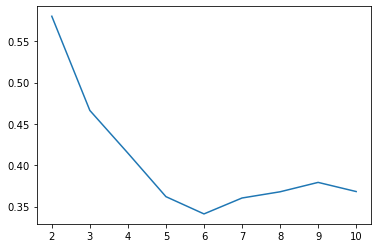

In [18]:
# Let us choose the value of K
# Check the Silhouette score
# Check the Elbow curve-ssd

from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(iris1)
    ss.append([k, silhouette_score(iris1, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

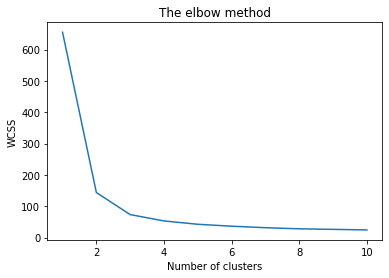

In [19]:
# Let us find the optimum number of clusters for k-means classification

x = iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

As we can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this, we choose the number of clusters as 3.

In [20]:
# Let us apply k=means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

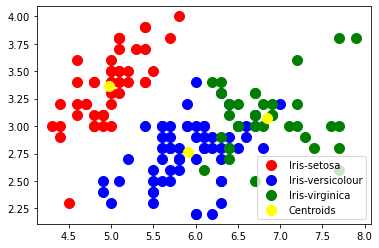

In [21]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

## 5. Conclusion

It can be observed that 'Petal' dimensions are better features to create cluster than 'Sepal' dimensions. After performing k-means clustering we got 3 as the optimal number of clusters